<a href="https://colab.research.google.com/github/Shreyas-P2004/Data-Analysis/blob/main/JP_Morgan_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression

In [52]:
natgas_df=pd.read_csv('//content/drive/MyDrive/JP Morgan Quantitative research/Nat_Gas.csv')


In [53]:
natgas_df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


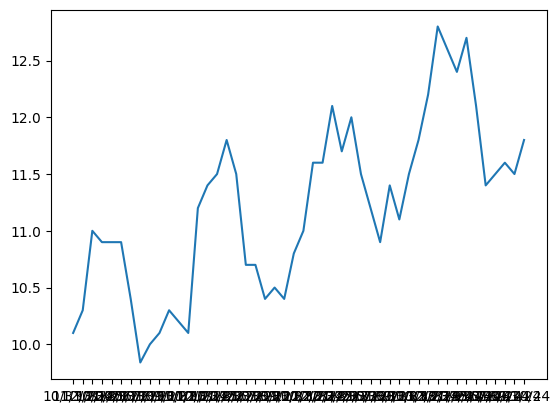

In [54]:
plt.plot(natgas_df['Dates'],natgas_df['Prices'])

In [55]:
# Select only January Prices
natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])

natgas_df['Year']  = natgas_df['Dates'].dt.year
natgas_df['Month'] = natgas_df['Dates'].dt.month

# Only Jan months
natgas_jan = natgas_df[natgas_df['Month'] == 1]
natgas_jan

<ipython-input-55-140762968>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])


,Dates,Prices,Year,Month
3,2021-01-31,10.9,2021,1
15,2022-01-31,11.5,2022,1
27,2023-01-31,12.1,2023,1
39,2024-01-31,12.6,2024,1


In [56]:
from re import X
from sklearn.linear_model import LinearRegression

X = np.array(natgas_df[natgas_df['Month'] == 1]['Year']).reshape(-1,1)
y = np.array(natgas_df[natgas_df['Month'] == 1]['Prices']).reshape(-1,1)
y

#reg = LinearRegression().fit(X,y)
#reg

array([[10.9],
       [11.5],
       [12.1],
       [12.6]])

In [57]:
round(float(reg.predict([[2025]])), 2)

<ipython-input-57-1564194405>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(float(reg.predict([[2025]])), 2)


13.2

In [58]:
# Extrapolation of an extra year

from sklearn.linear_model import LinearRegression

def next_year_price(next_year):
    """Returns a predicted natural gas prices for each month in the following year"""

    price_list = []
    for i in np.arange(12):
        X = np.array(natgas_df[natgas_df['Month'] == 1+i]['Year']).reshape(-1,1)
        y = np.array(natgas_df[natgas_df['Month'] == 1+i]['Prices'])
        reg = LinearRegression().fit(X,y)
        price = reg.predict([[next_year]])
        price_list.append(round(float(price),2))

    return price_list


In [59]:
gas_price25 = next_year_price(2025)
np.array(gas_price25)

<ipython-input-58-3316096448>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price),2))
<ipython-input-58-3316096448>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price),2))
<ipython-input-58-3316096448>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price),2))
<ipython-input-58-3316096448>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is 

array([13.2 , 12.8 , 13.25, 12.65, 12.08, 11.95, 12.25, 11.9 , 12.45,
       12.85, 13.46, 13.66])

In [44]:
def get_last_of_each_month(year):
    dates_array = []
    current_date = datetime(year,12, 31) # Start from the last day of the year
    while current_date.year == year:


        dates_array.append(current_date.strftime("%Y-%m-%d"))
        month = current_date.month
        year = current_date.year

        # Move to the first day of the previous month
        current_date = current_date.replace(year=year, month=month, day=1)
        # Move back one day to get the last day of the current month
        current_date  -= timedelta(days=1)

    return dates_array[::-1] # Reverse the array to get the dates in ascending order

In [60]:
dates_2025 = get_last_of_each_month(2025)
dates_2025

['2025-01-31',
 '2025-02-28',
 '2025-03-31',
 '2025-04-30',
 '2025-05-31',
 '2025-06-30',
 '2025-07-31',
 '2025-08-31',
 '2025-09-30',
 '2025-10-31',
 '2025-11-30',
 '2025-12-31']

In [61]:
# New dataframe of 2025 dates and prices
projected_gas_prices25_df = pd.DataFrame({'Dates': dates_2025, 'Prices': gas_price25})
projected_gas_prices25_df

projected_gas_prices25_df['Dates'] = pd.to_datetime(projected_gas_prices25_df['Dates'])

projected_gas_prices25_df['Year']  = projected_gas_prices25_df['Dates'].dt.year
projected_gas_prices25_df['Month'] = projected_gas_prices25_df['Dates'].dt.month
projected_gas_prices25_df

,Dates,Prices,Year,Month
0,2025-01-31,13.20,2025,1
1,2025-02-28,12.80,2025,2
2,2025-03-31,13.25,2025,3
3,2025-04-30,12.65,2025,4
4,2025-05-31,12.08,2025,5
5,2025-06-30,11.95,2025,6
6,2025-07-31,12.25,2025,7
7,2025-08-31,11.90,2025,8
8,2025-09-30,12.45,2025,9
9,2025-10-31,12.85,2025,10


In [63]:
gas_df = pd.concat([natgas_df, projected_gas_prices25_df] , ignore_index=True)
gas_df

,Dates,Prices,Year,Month
0,2020-10-31,10.10,2020,10
1,2020-11-30,10.30,2020,11
2,2020-12-31,11.00,2020,12
3,2021-01-31,10.90,2021,1
4,2021-02-28,10.90,2021,2
5,2021-03-31,10.90,2021,3
6,2021-04-30,10.40,2021,4
7,2021-05-31,9.84,2021,5
8,2021-06-30,10.00,2021,6
9,2021-07-31,10.10,2021,7


In [64]:
def get_gas_price(month, year):
    '''Input month and year to retrieve predicted or historic gas price'''
    print(gas_df[(gas_df['Month'] == month) & (gas_df['Year'] == year)]['Prices'])

In [65]:
get_gas_price(10, 2025)

57    12.85
Name: Prices, dtype: float64


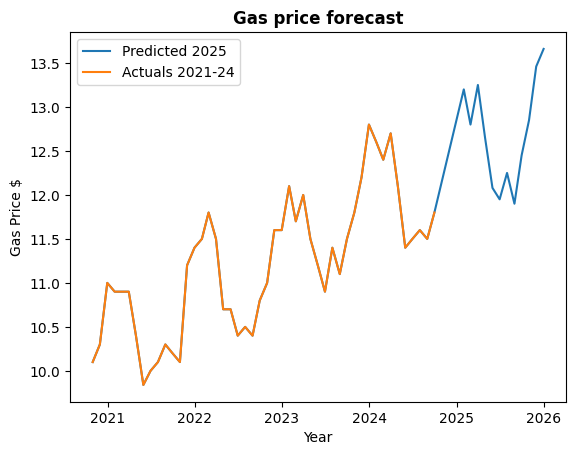

In [66]:
# Final analysis
plt.plot(gas_df['Dates'], gas_df['Prices'], label = 'Predicted 2025')
plt.plot(natgas_df['Dates'],natgas_df['Prices'], label = 'Actuals 2021-24')
plt.ylabel('Gas Price $')
plt.xlabel('Year')
plt.title('Gas price forecast', fontweight = 'bold')
plt.legend()